In [18]:
import json
import os 

import pandas as pd

import matplotlib
from PIL import Image

Image.MAX_IMAGE_PIXELS = None
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

with open("../config/config_notebooks_TNBC.json", "r") as config_file:
    config = json.load(config_file)

In [25]:
if not os.path.exists(os.path.join(config['figures_folder'], "shannon_entropy")):
    os.makedirs(os.path.join(config['figures_folder'], "shannon_entropy"))

In [26]:
shannon_whole = {}
shannon_invasive = {}

list_for_df_shannon = []

for p, model_name in zip(config['path_to_retrained_pipelines_1'],
                         config['retrained_model_list1']):
    
    try:
        print("Path", os.path.join(p, "shannon_entropy", config['dataset'], "shannon_entropy.json"))
        with open(os.path.join(p, "shannon_entropy", config['dataset'], "shannon_entropy.json"), "r") as f:
            shannon_entropy = json.load(f)
            
            shannon_whole[model_name] = shannon_entropy['whole_matrix']['raw_all_patches']
            shannon_invasive[model_name] = shannon_entropy['whole_matrix']['raw_cancer_patches']
            
        list_for_df_shannon.append({
            'model': model_name,
            'shannon_whole': shannon_whole[model_name],
            'shannon_invasive': shannon_invasive[model_name]
        })
    except:
        list_for_df_shannon.append({
            'model': model_name,
            'shannon_whole': 0,
            'shannon_invasive': 0
        })
        
        
        
for p, model_name in zip(config['path_to_retrained_pipelines_2'],
                         config['retrained_model_list2']):
    
    
    try:
        with open(os.path.join(p, "shannon_entropy", config['dataset'], "shannon_entropy.json"), "r") as f:
            shannon_entropy = json.load(f)
            
            shannon_whole[model_name] = shannon_entropy['whole_matrix']['raw_all_patches']
            shannon_invasive[model_name] = shannon_entropy['whole_matrix']['raw_cancer_patches']
            
        list_for_df_shannon.append({
            'model': model_name,
            'shannon_whole': shannon_whole[model_name],
            'shannon_invasive': shannon_invasive[model_name]
        })
    except:
        list_for_df_shannon.append({
            'model': model_name,
            'shannon_whole': 0,
            'shannon_invasive': 0
        })



Path ../pipeline/TNBC/uni/shannon_entropy/TNBC/shannon_entropy.json
Path ../pipeline/TNBC/uni_explora_kde_4096_prototypes/shannon_entropy/TNBC/shannon_entropy.json
Path ../pipeline/TNBC/uni_explora_kde_16384_prototypes/shannon_entropy/TNBC/shannon_entropy.json
Path ../pipeline/TNBC/uni_explora_kde_65536_prototypes/shannon_entropy/TNBC/shannon_entropy.json
Path ../pipeline/TNBC/uni_explora_koleo_4096_prototypes/shannon_entropy/TNBC/shannon_entropy.json
Path ../pipeline/TNBC/uni_explora_koleo_16384_prototypes/shannon_entropy/TNBC/shannon_entropy.json
Path ../pipeline/TNBC/uni_explora_koleo_65536_prototypes/shannon_entropy/TNBC/shannon_entropy.json


In [27]:
df_shannon = pd.DataFrame.from_dict(list_for_df_shannon).drop_duplicates()
df_shannon.set_index('model', inplace=True)

In [28]:
df_shannon['diff'] = df_shannon['shannon_invasive'] - df_shannon['shannon_whole']

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df_shannon = df_shannon.loc[["uni",
              "uni_explora_kde_4096_prototypes",
              "uni_explora_kde_16384_prototypes",
                "uni_explora_kde_65536_prototypes",
                "uni_full_kde_4096_prototypes",
                "uni_full_kde_16384_prototypes",
                "uni_full_kde_65536_prototypes",
                "uni_explora_koleo_4096_prototypes",
                "uni_explora_koleo_16384_prototypes",
                "uni_explora_koleo_65536_prototypes",
                "uni_full_koleo_4096_prototypes",
                "uni_full_koleo_16384_prototypes",
                "uni_full_koleo_65536_prototypes"]]

/tmp/ipykernel_2108694/2918672357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_shannon,


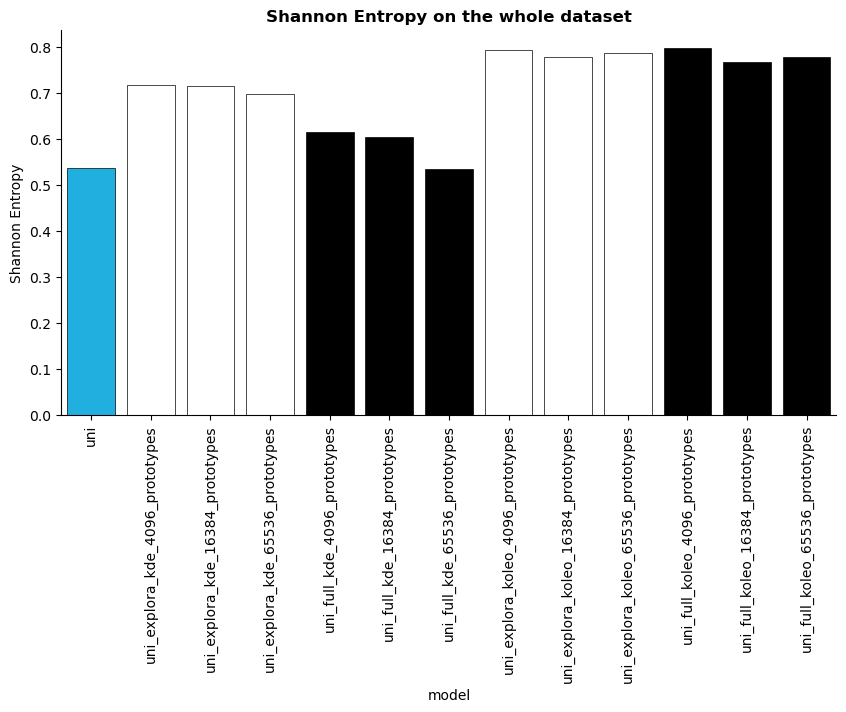

In [31]:


plt.figure(figsize=(10, 5))



sns.barplot(df_shannon, 
            x=df_shannon.index, 
            y="shannon_whole", 
            palette=["deepskyblue", "white", "white", "white", "black","black", "black", "white", "white", "white", "black", "black","black"], 
            linewidth=0.5,
            edgecolor="black",
            )
plt.ylabel(r"Shannon Entropy")
plt.xticks(rotation=90)
sns.despine()
plt.title("Shannon Entropy on the whole dataset", weight="bold")
plt.savefig(os.path.join(config['figures_folder'], "shannon_entropy", "shannon_entropy_retrained_models_whole.pdf"), bbox_inches='tight', dpi=300)

/tmp/ipykernel_2108694/3530090266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_shannon,


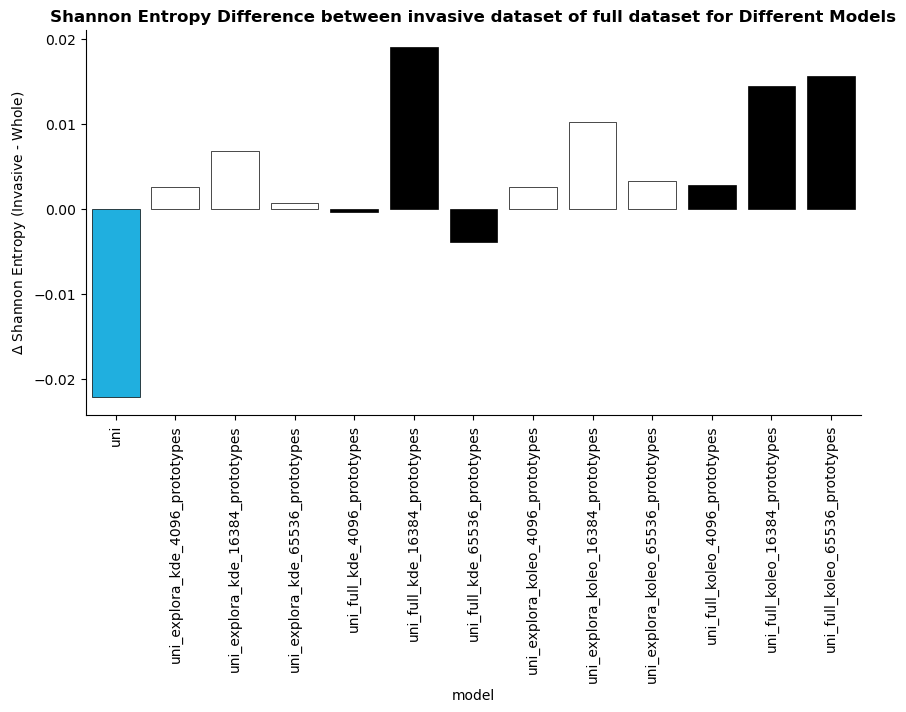

In [32]:


plt.figure(figsize=(10, 5))



sns.barplot(df_shannon, 
            x=df_shannon.index, 
            y="diff", 
            palette=["deepskyblue", "white", "white", "white", "black","black", "black", "white", "white", "white", "black", "black","black"], 
            linewidth=0.5,
            edgecolor="black",
            )
plt.ylabel(r"$\Delta$ Shannon Entropy (Invasive - Whole)")
plt.xticks(rotation=90)
sns.despine()
plt.title("Shannon Entropy Difference between invasive dataset of full dataset for Different Models", weight="bold")
plt.savefig(os.path.join(config['figures_folder'], "shannon_entropy", "shannon_entropy_difference_retrained_models.pdf"), bbox_inches='tight', dpi=300)